In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle
import os
import pandas as pd


In [2]:
def plot_spike_trains(spike_trains, title='Spike Trains'):
    """
    """
    plt.figure(dpi = 100)
    for i in range(len(spike_trains)):
        positions = np.arange(0, nb_steps)
        spike_positions = positions[spike_trains[i] == 1]
        plt.eventplot(spike_positions, lineoffsets=i)
    plt.xlim(0, nb_steps)
    plt.title(title)
    plt.xlabel('Timestep')
    plt.ylabel('Spike Train No.')
    plt.show()

Text(0.5, 1.0, 'Loss over epochs')

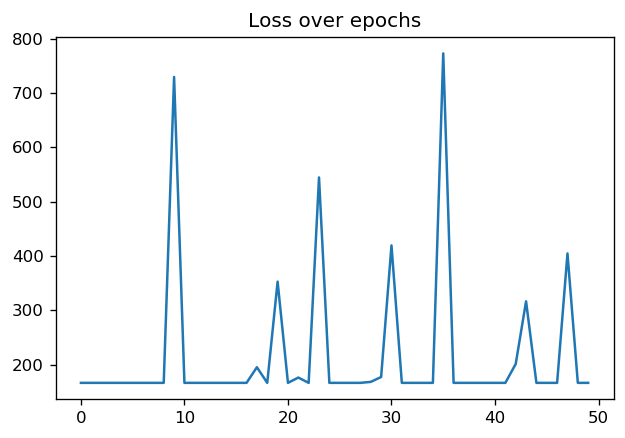

In [4]:
# Load recordings file
# recordings_file = 'data/multilayer/2022-04-03 01 rate = 0.05/recordings epsilon= 0.0001learning_rate = 0.05spike freq = 10'
recordings_file = 'data/multilayer/2022-04-03 15 rate = 0.05/recordings epsilon= 0.0001learning_rate = 0.05spike freq = 10'
recordings = pd.read_pickle(recordings_file)

# Load Loss Plot
# loss_rec_file = 'data/multilayer/2022-04-03 01 rate = 0.05/loss_rec epsilon= 0.0001learning_rate = 0.05spike freq = 10'
loss_rec_file = 'data/multilayer/2022-04-03 15 rate = 0.05/loss_rec epsilon= 0.0001learning_rate = 0.05spike freq = 10'
loss_rec = pd.read_pickle(loss_rec_file)

args, input_trains, neural_dynamics, weight_dynamics, learning_rate_dynamics = recordings[0]
spk_rec_1, spk_rec_2, mem_rec_1, mem_rec_2, presynaptic_traces_1, presynaptic_traces_2, eligibility_1, eligibility_2, output_error, feedback_error = neural_dynamics
w1_rec, w2_rec, weight_change_1_rec, weight_change_2_rec, weight_update_1_rec, weight_update_2_rec = weight_dynamics
learning_rate_1_rec, learning_rate_2_rec, v_ij_1_rec, v_ij_2_rec, g_ij2_1_rec, g_ij2_2_rec = learning_rate_dynamics


#Plot Loss
plt.figure(dpi=120)
plt.plot(loss_rec.flatten())
plt.title("Loss over epochs")


### Spike Trains

#### Combined Raster Plot

Text(0.5, 0.98, 'Spike Raster at epoch: 0')

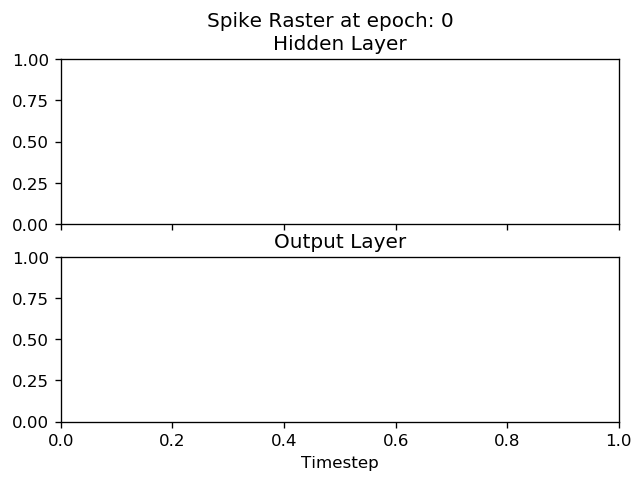

In [25]:
epoch=0
fig, axs = plt.subplots(2, 1, sharex=True, dpi=120)
nb_steps = args['nb_steps']
positions = np.arange(0, nb_steps)
for i in range(args['nb_hidden']):
    spike_positions_1 = positions[spk_rec_1[epoch, i, :] == 1]
    axs[0].eventplot(spike_positions_1, lineoffsets=i)
axs[0].set_title("Hidden Layer")

spike_positions_2 = positions[spk_rec_2[epoch, 0, :] == 1]
axs[1].eventplot(spike_positions_2)
axs[1].set_title("Output Layer")
axs[1].set_xlabel("Timestep")

fig.suptitle("Spike Raster at epoch: " + str(epoch))

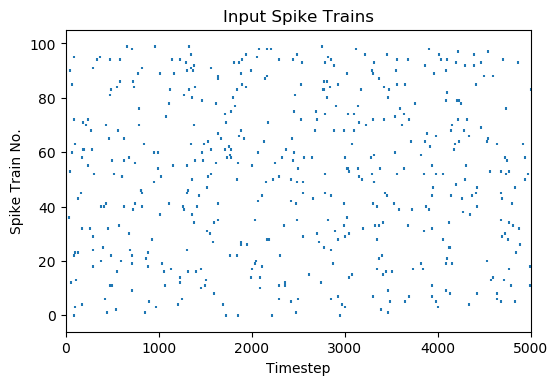

In [7]:
plot_spike_trains(input_trains, "Input Spike Trains")

### Membrane Potential

#### Hidden Layer

Text(0.5, 1.0, 'Output Layer')

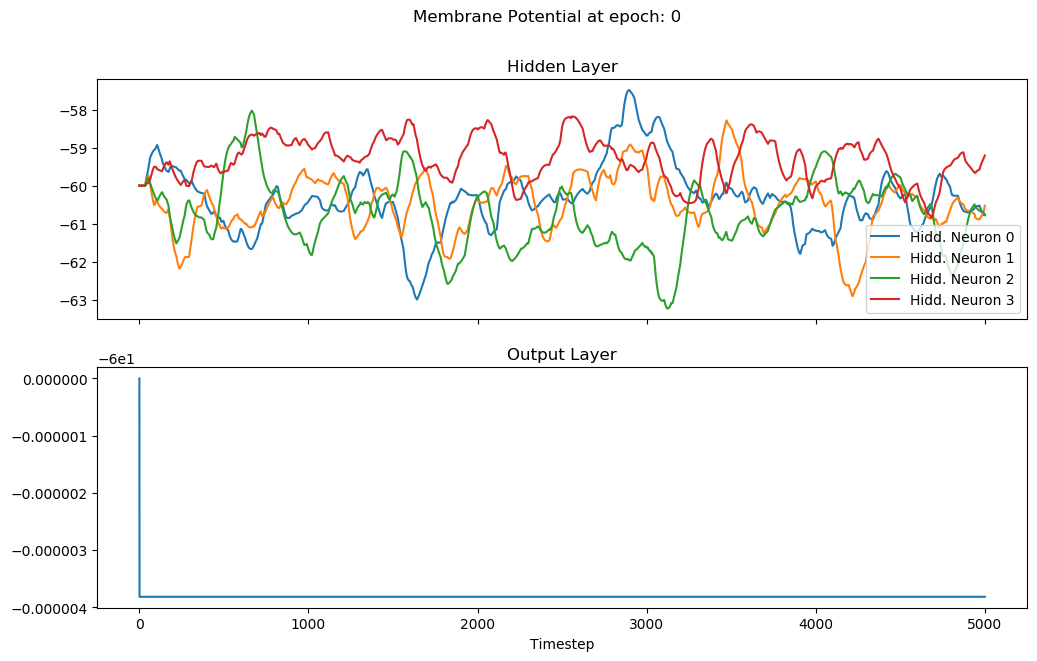

In [23]:
epoch = 0
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 7), dpi=100)
fig.suptitle("Membrane Potential at epoch: " + str(epoch))

for i in range(len(mem_rec_1[epoch])):
    axs[0].plot(mem_rec_1[epoch, i], label="Hidd. Neuron " + str(i))
axs[0].set_title("Hidden Layer")
axs[0].legend()

axs[1].plot(mem_rec_2[epoch].flatten())

axs[1].set_xlabel("Timestep")
axs[1].set_title("Output Layer")

#### Output layer

### Eligibility Trace

Text(0.5, 0, 'Timestep')

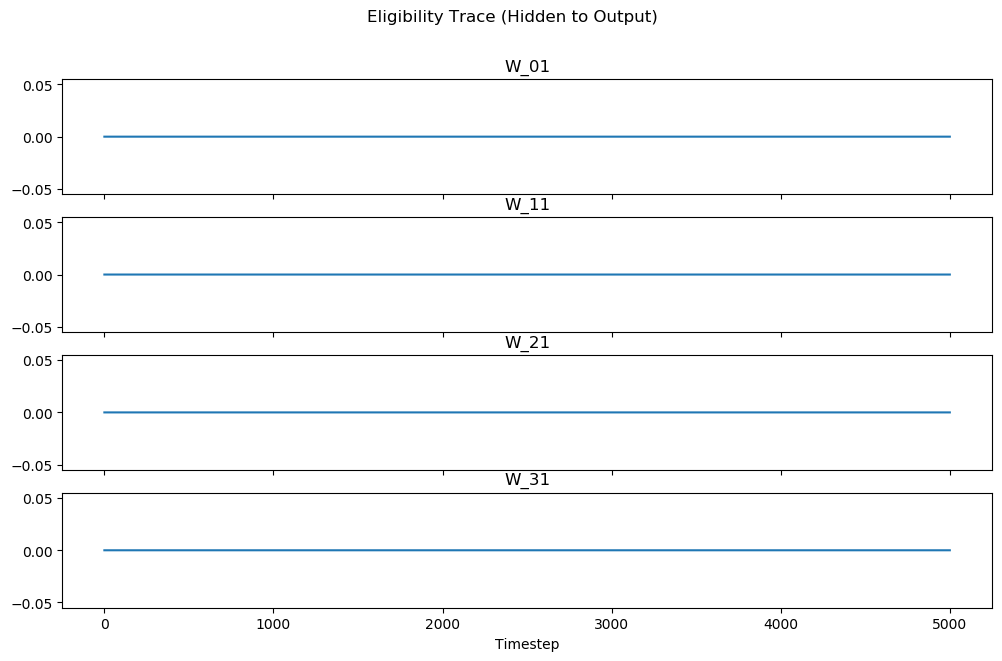

In [27]:
eligibility_2.shape
epoch = 0

fig, axs = plt.subplots(len(eligibility_2[epoch]), 1, sharex=True, figsize=(12, 7), dpi=100)
fig.suptitle("Eligibility Trace (Hidden to Output)")
for i in range(len(eligibility_2[epoch])):
    axs[i].plot(eligibility_2[epoch, i, 0, :])
    axs[i].set_title('W_' + str(i) + str(1))
axs[i].set_xlabel("Timestep")


### Presynaptic Traces

In [102]:
presynaptic_traces_1.shape


torch.Size([50, 100, 5000])

### Error Signal

#### Output layer

Text(0.5, 0.98, 'Error Signal at epoch: 0')

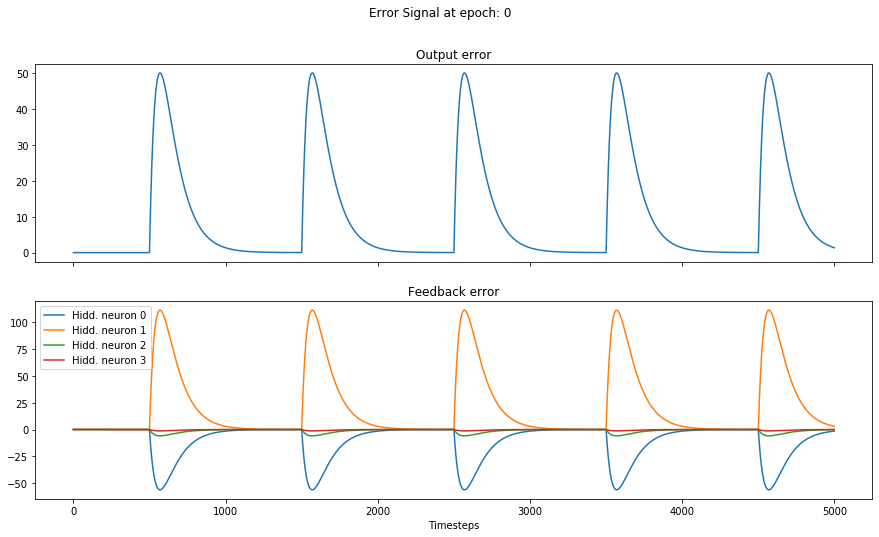

In [24]:
epoch = 0
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 8))

axs[0].plot(output_error[epoch])
axs[0].set_title("Output error")

for i in range(len(feedback_error[epoch].T)):
    axs[1].plot(feedback_error[epoch].T[i], label="Hidd. neuron "+str(i) )
axs[1].set_xlabel("Timesteps")
axs[1].set_title("Feedback error")
axs[1].legend()

fig.suptitle("Error Signal at epoch: " + str(epoch))

### Weights

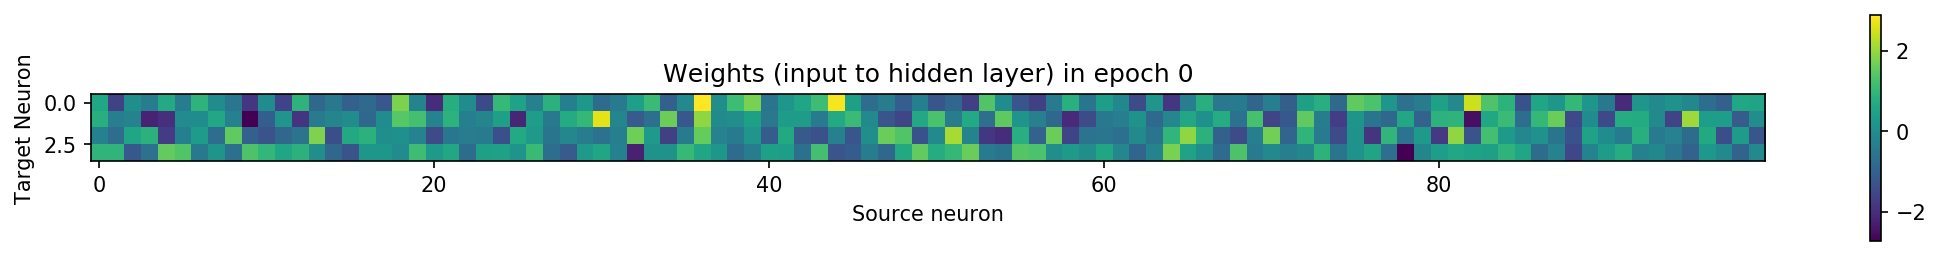

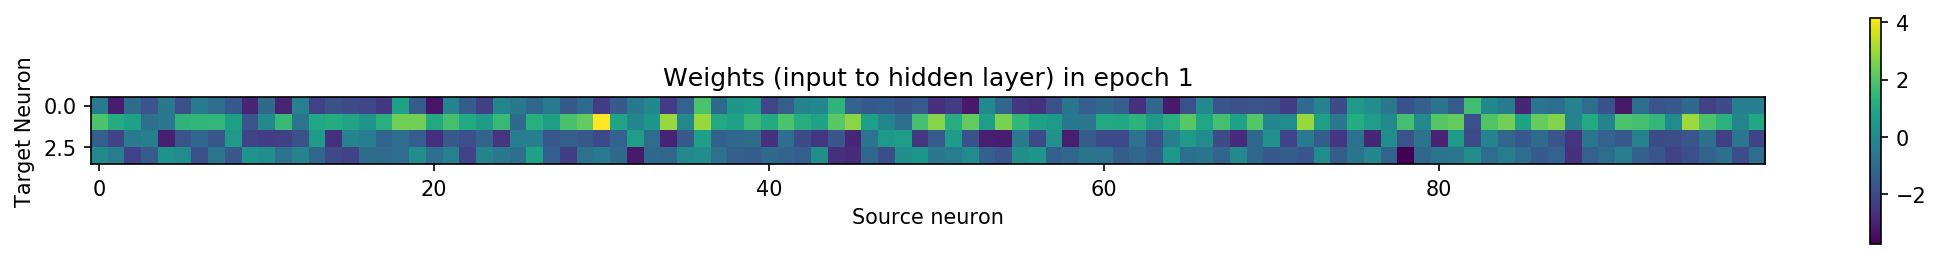

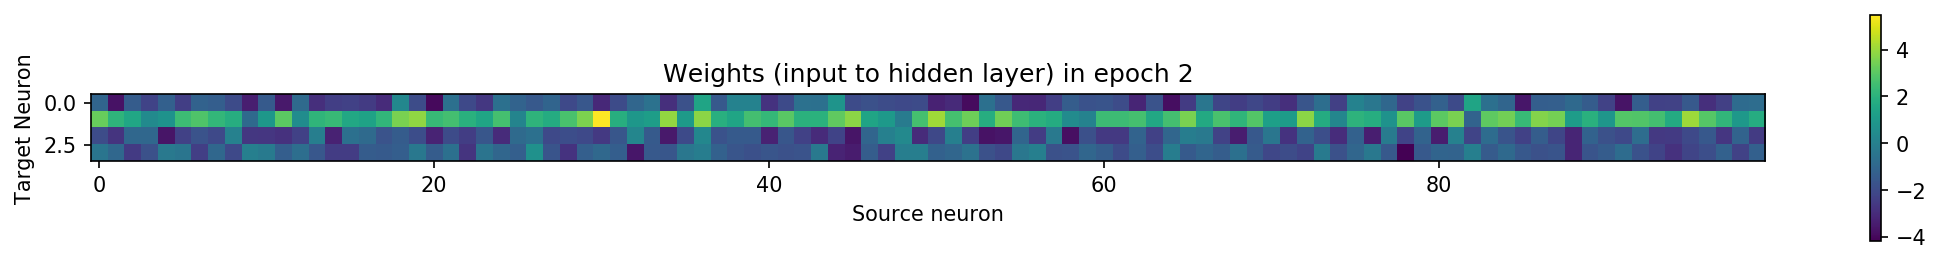

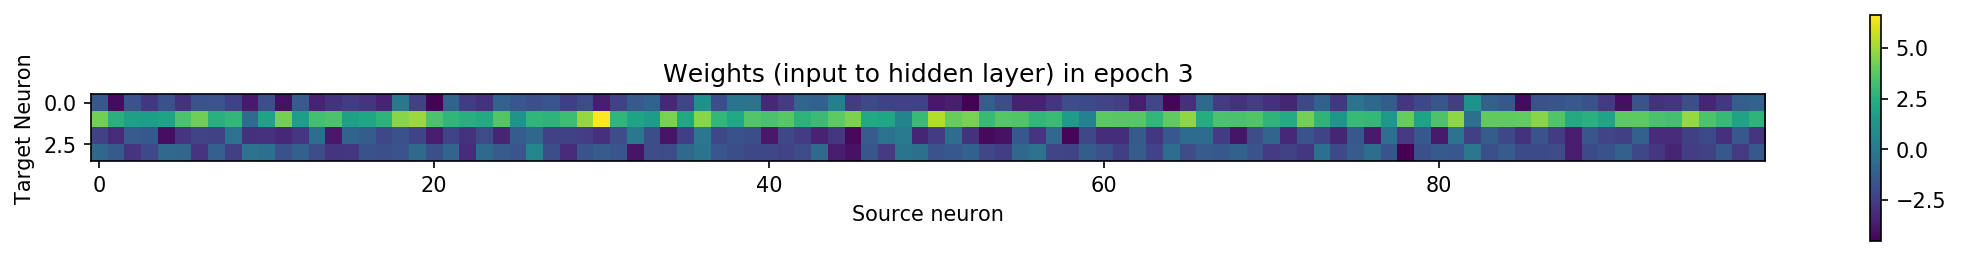

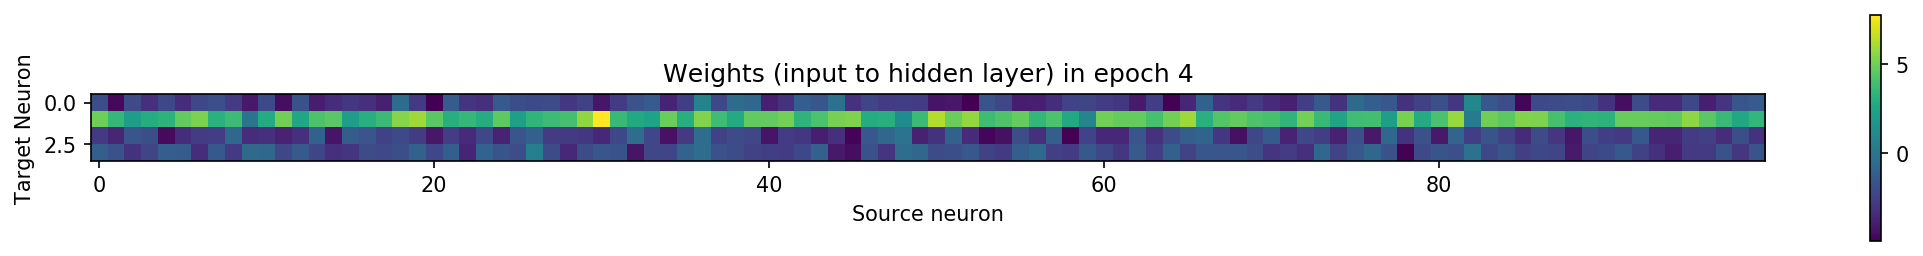

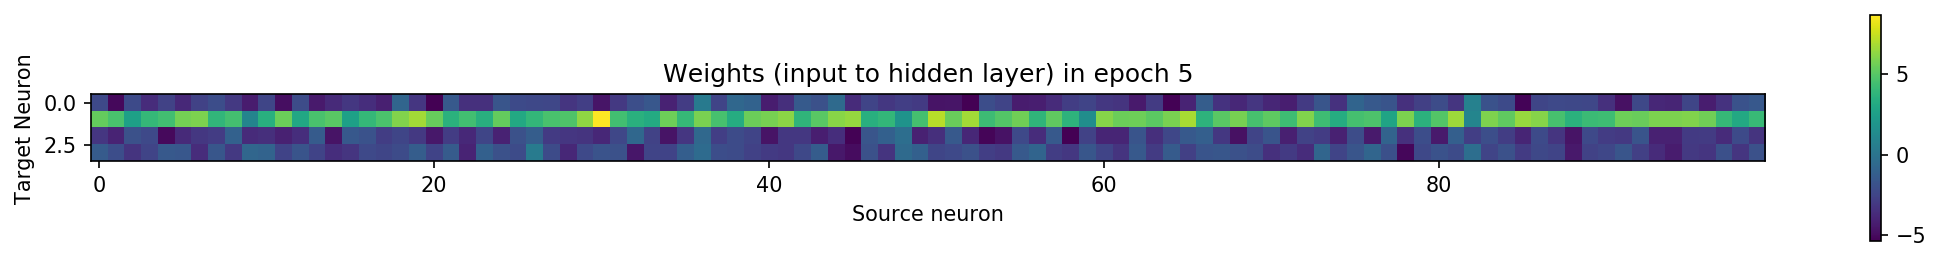

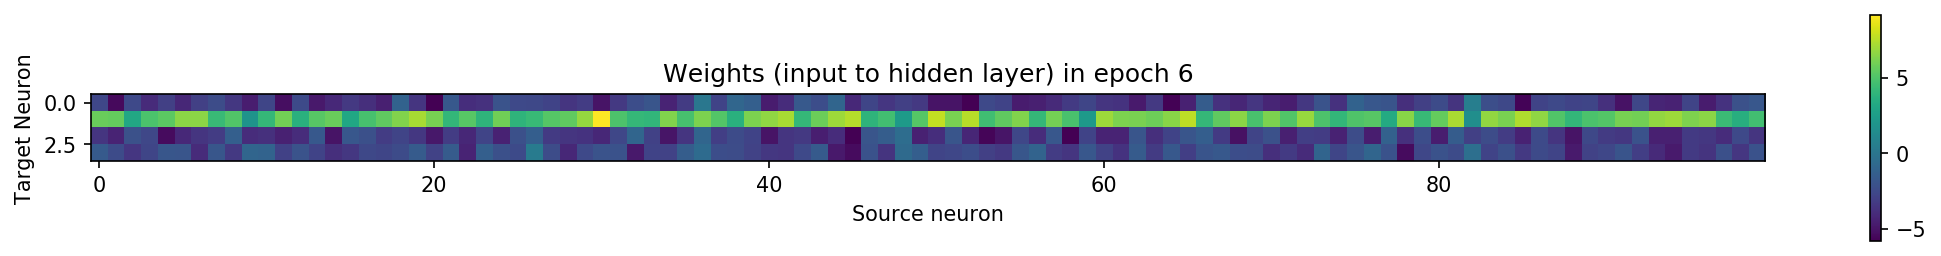

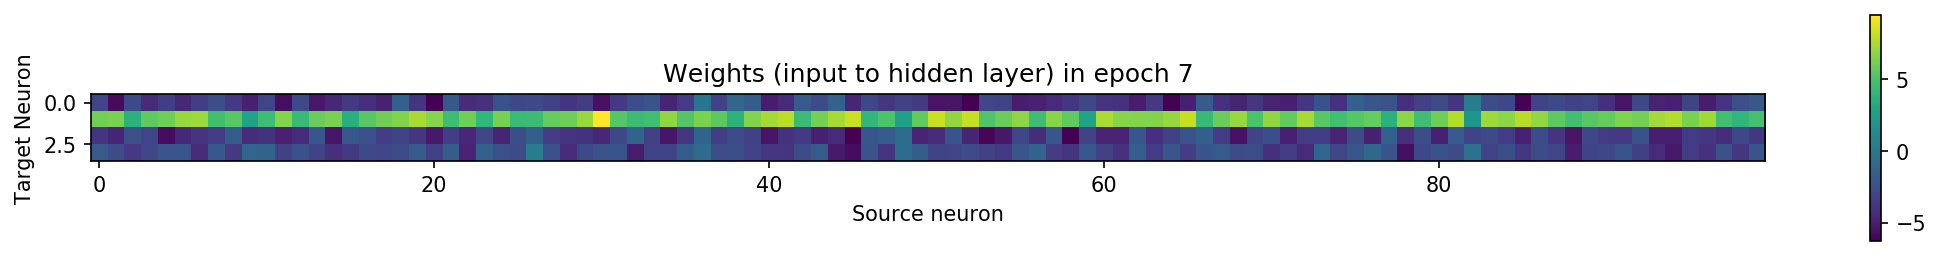

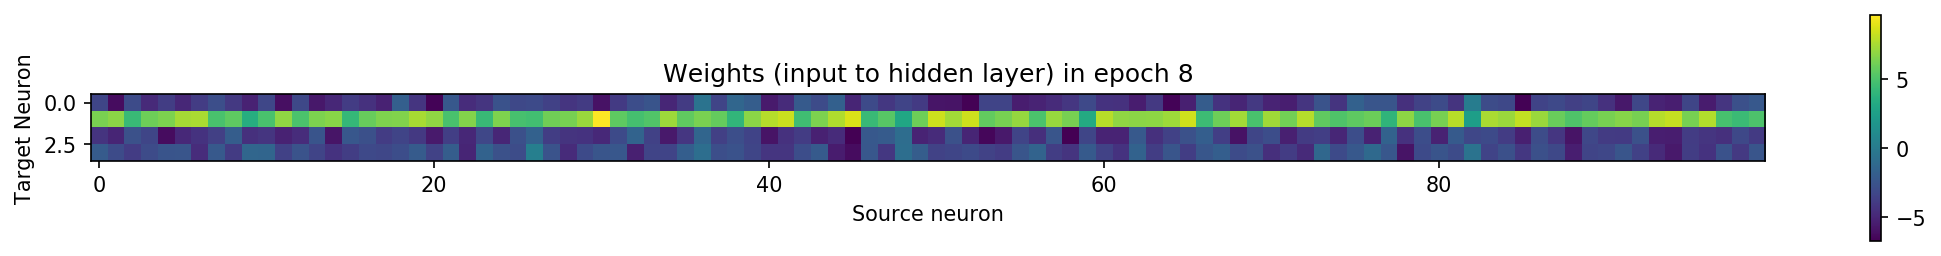

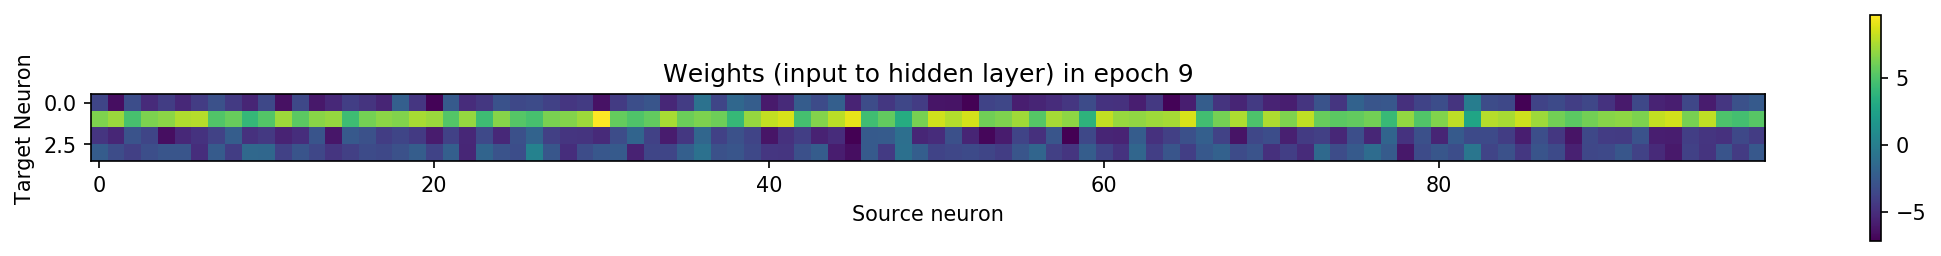

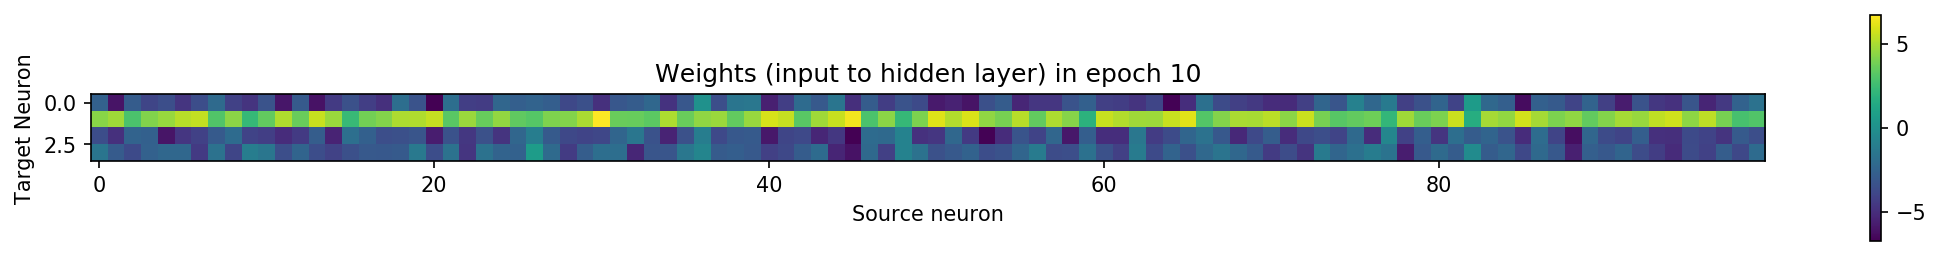

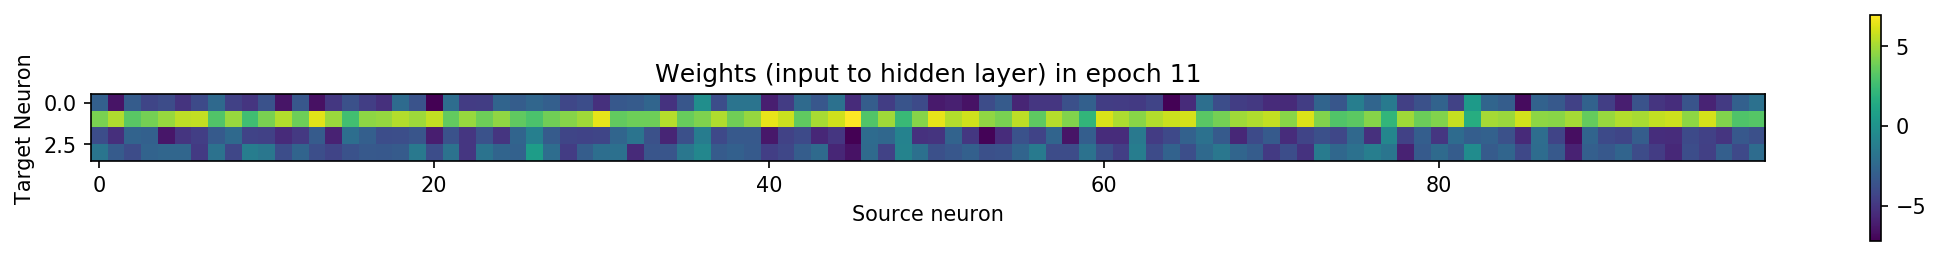

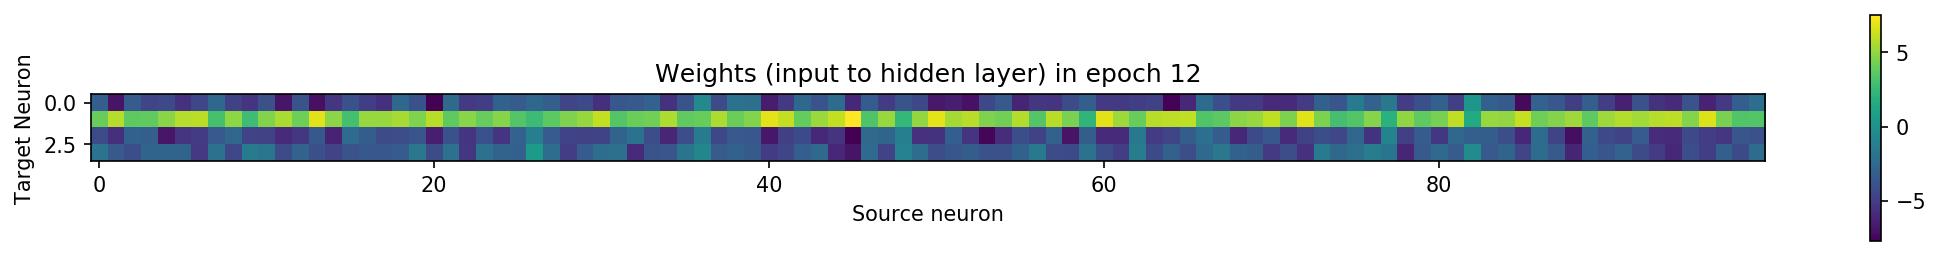

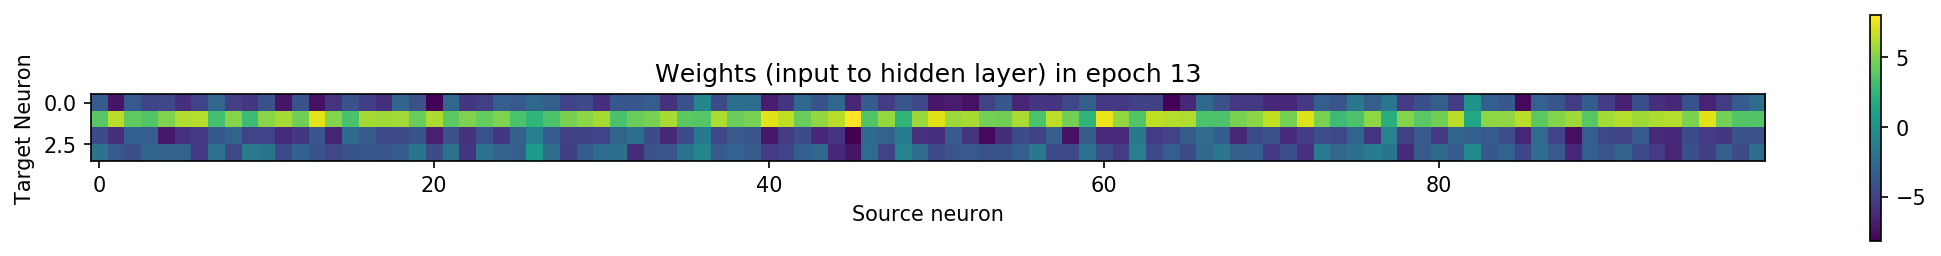

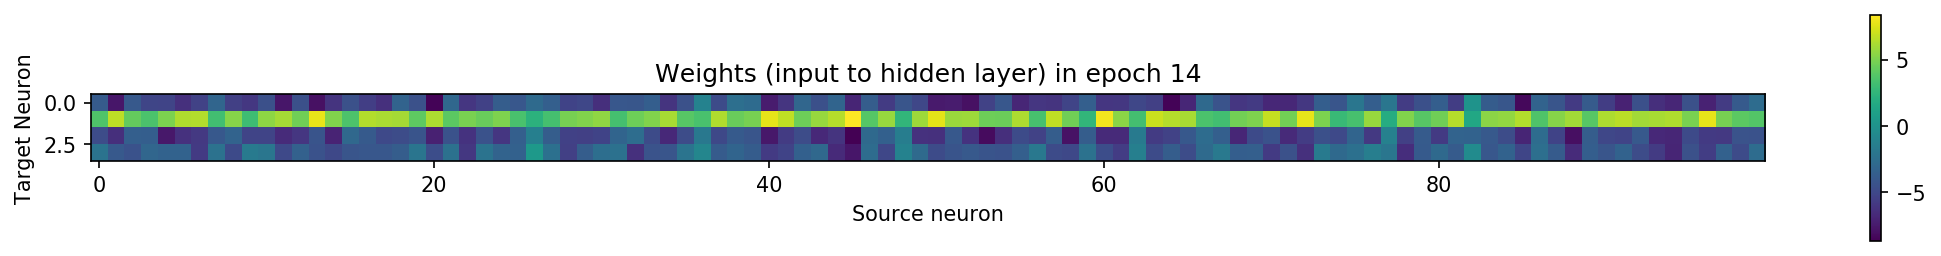

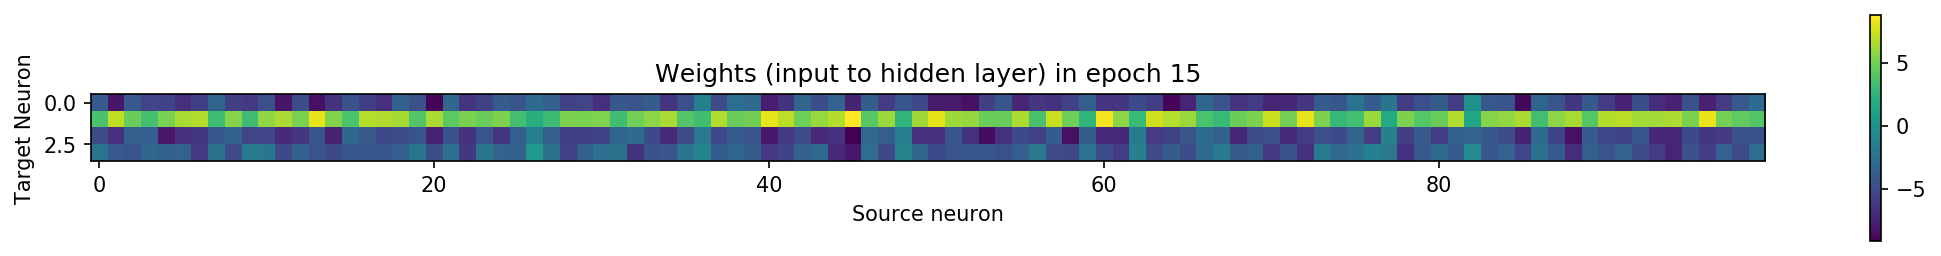

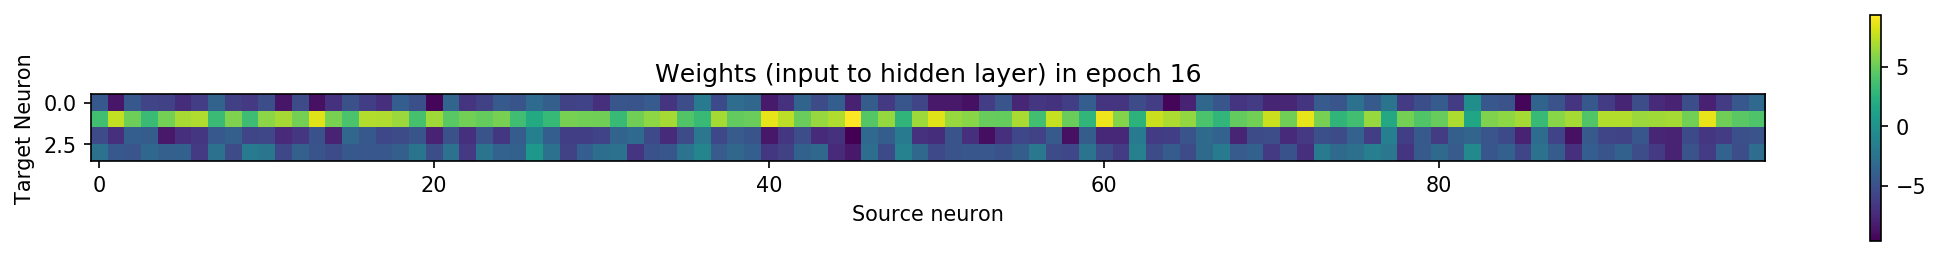

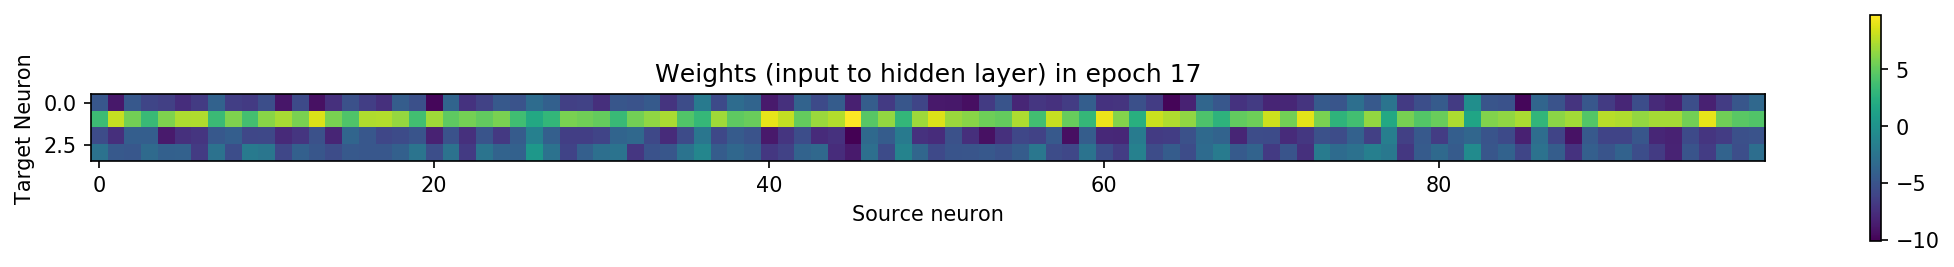

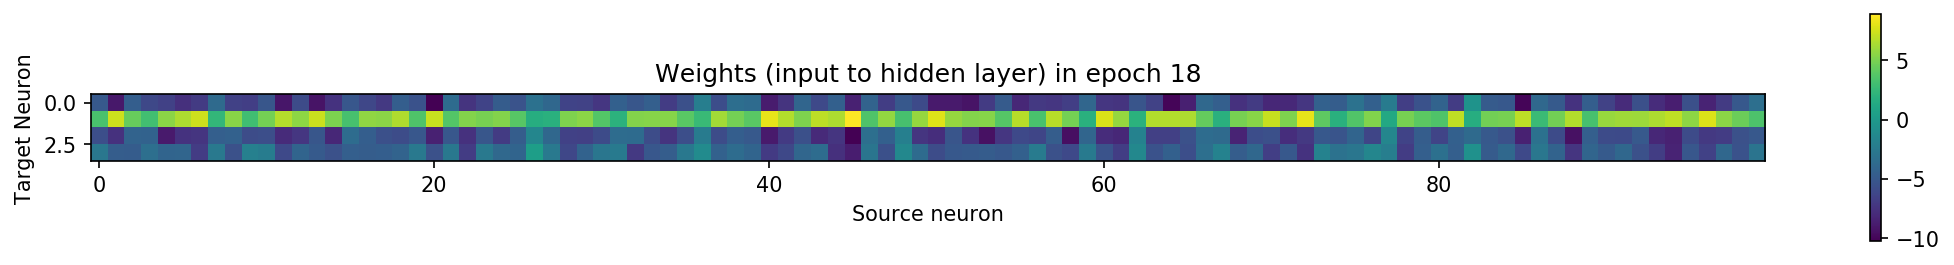

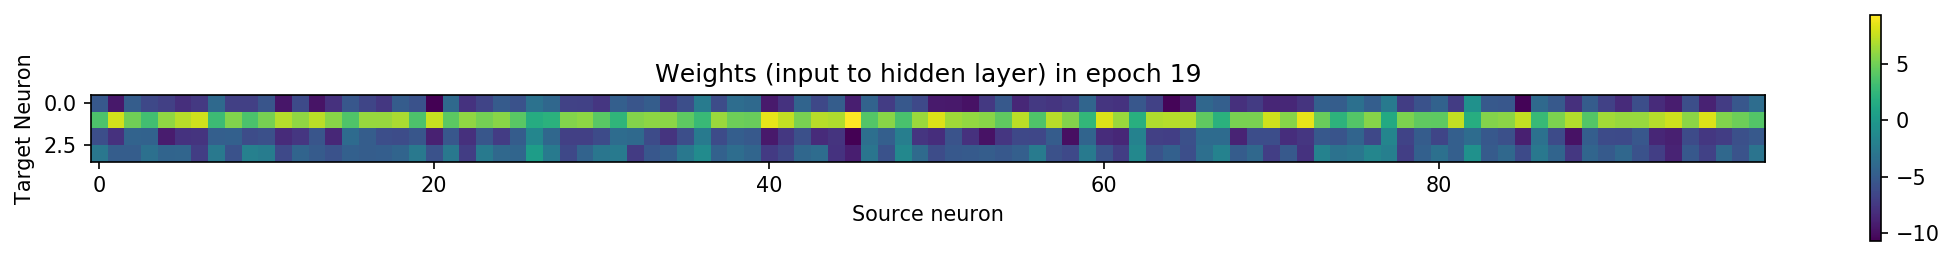

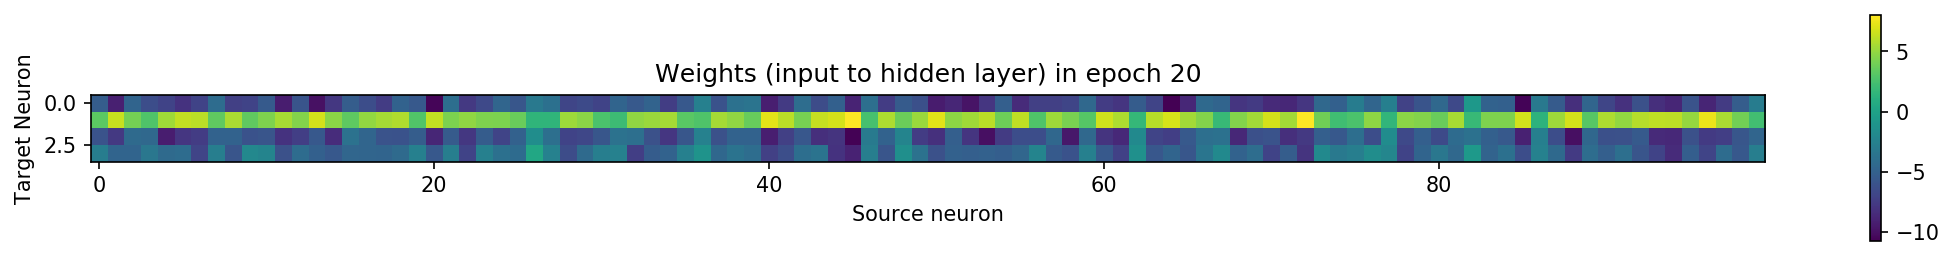

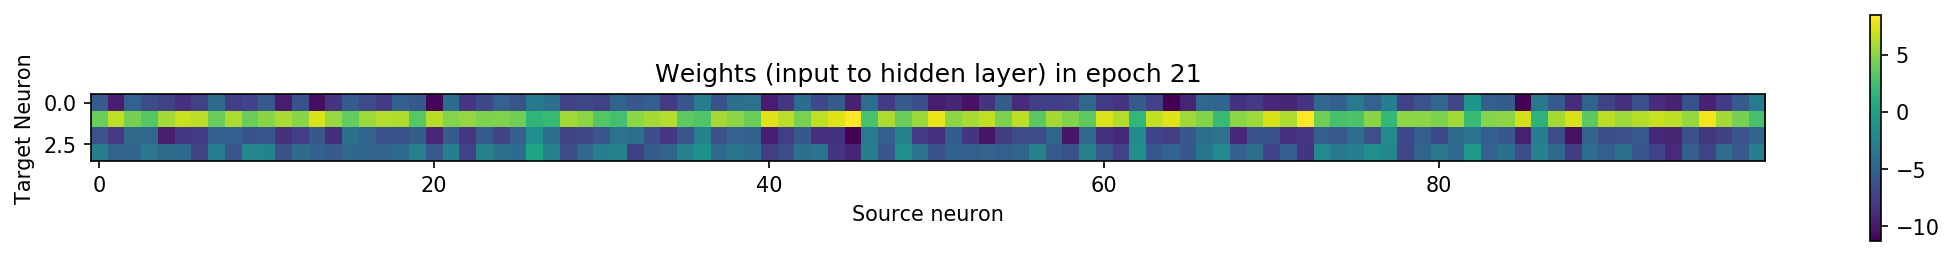

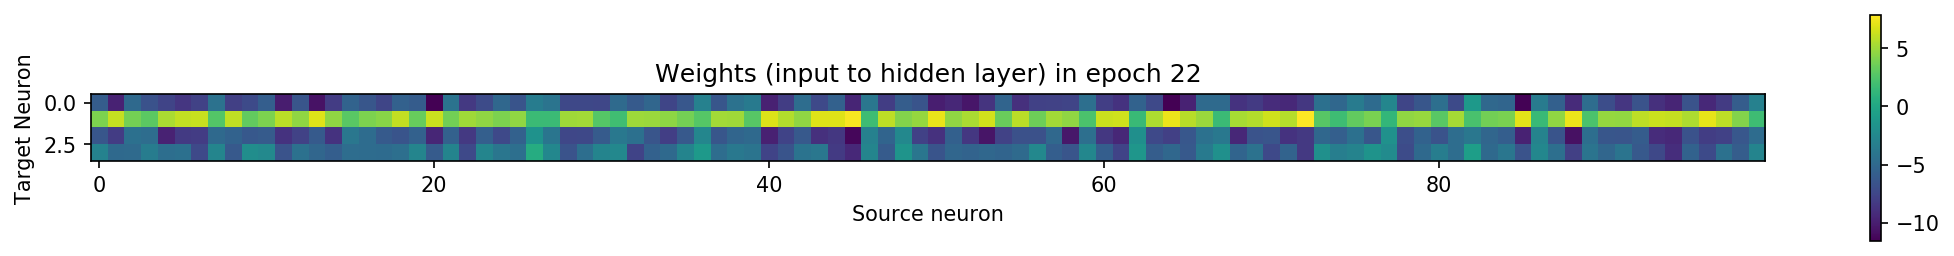

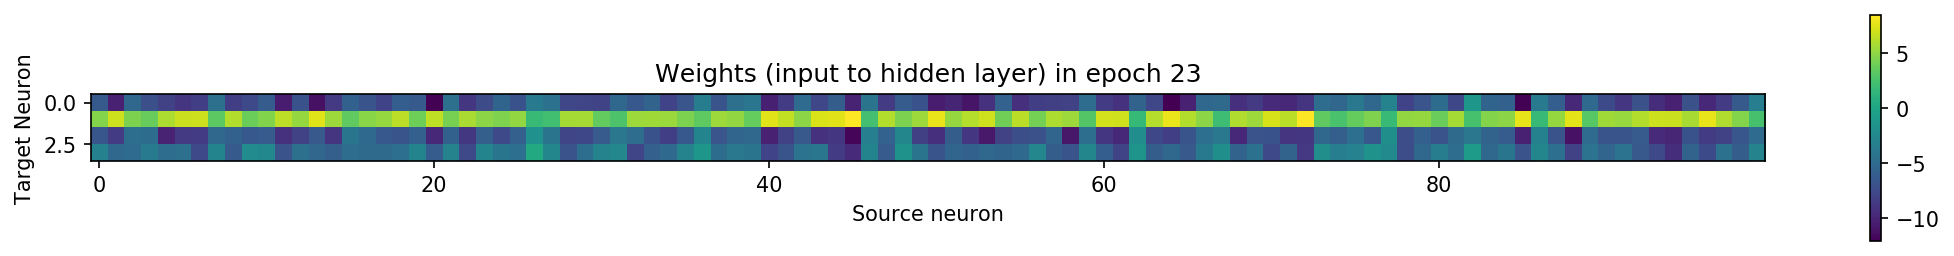

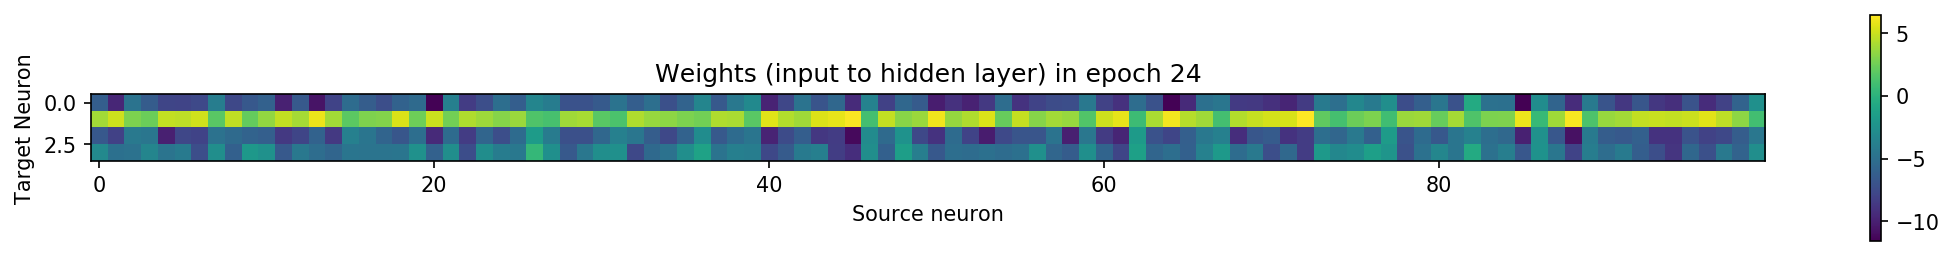

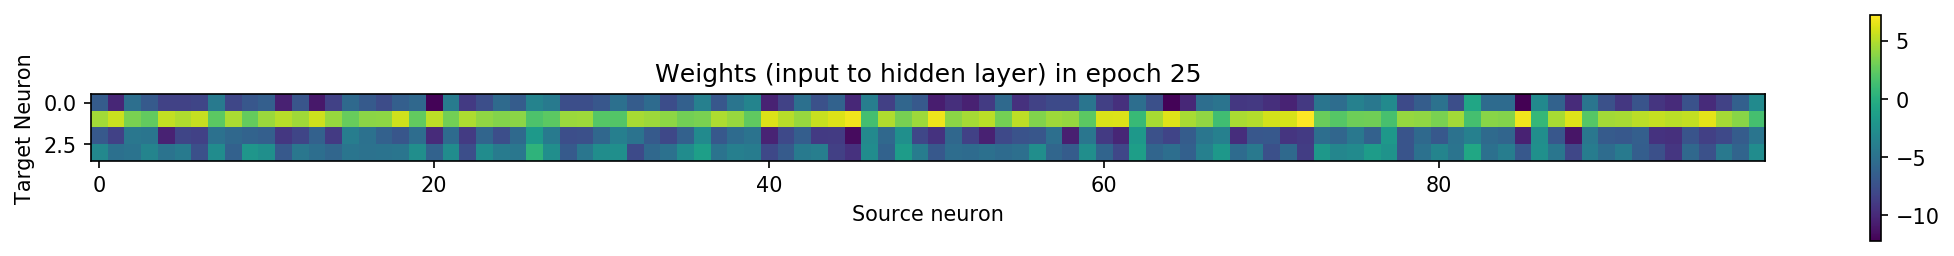

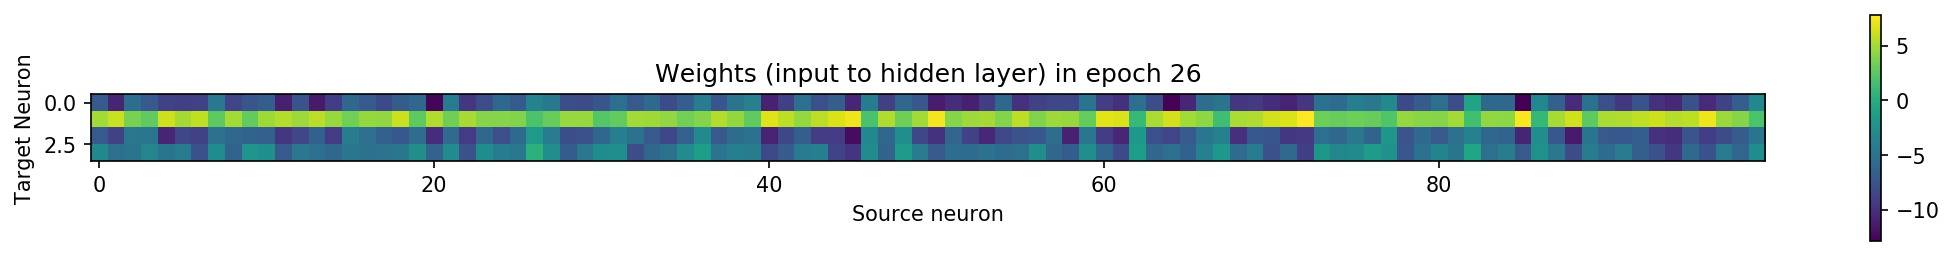

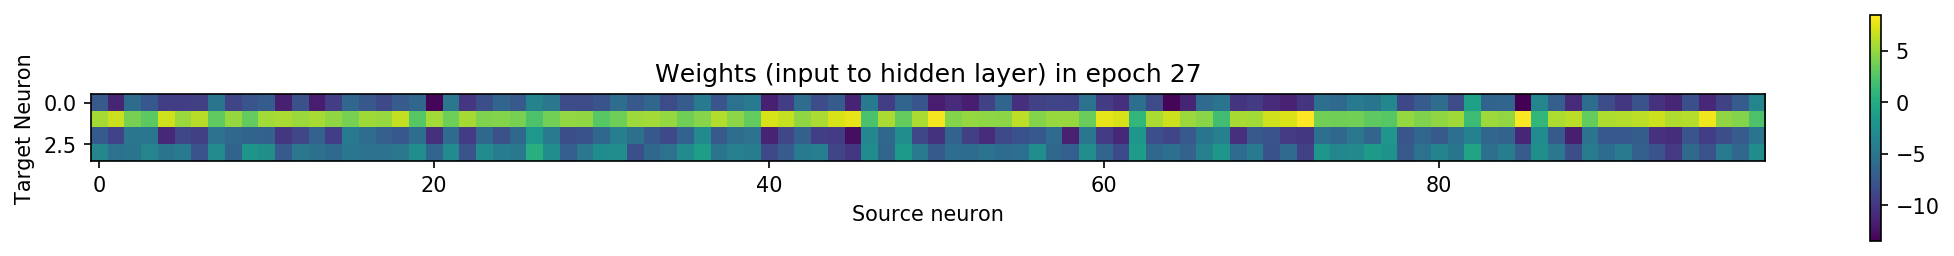

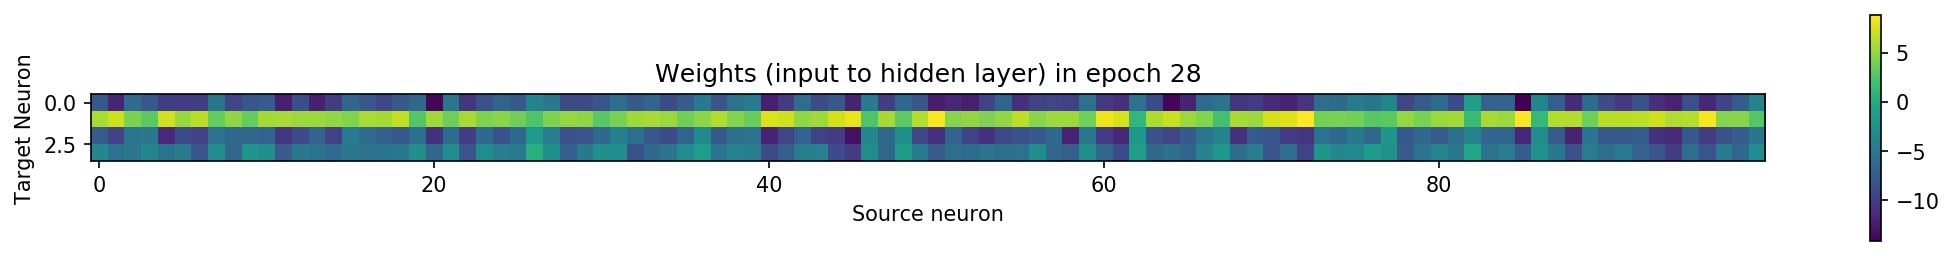

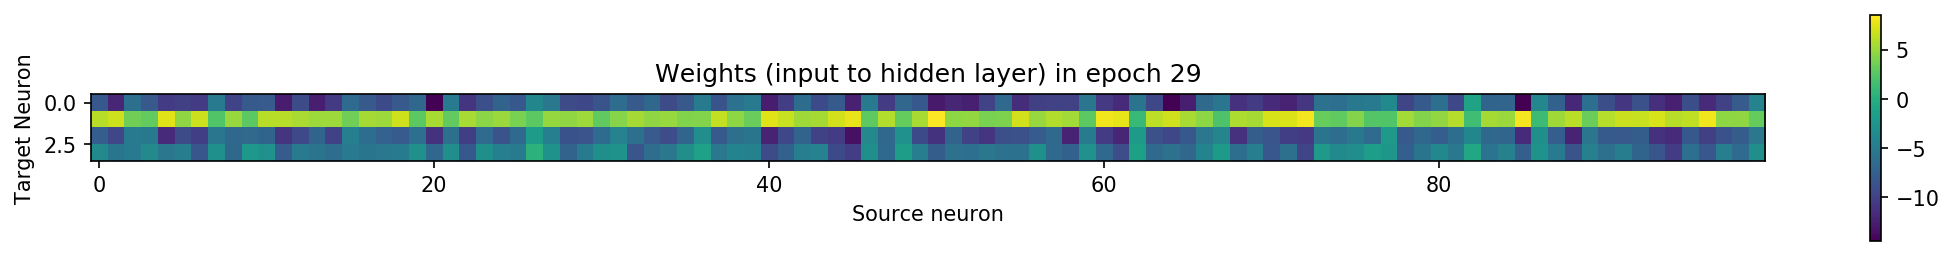

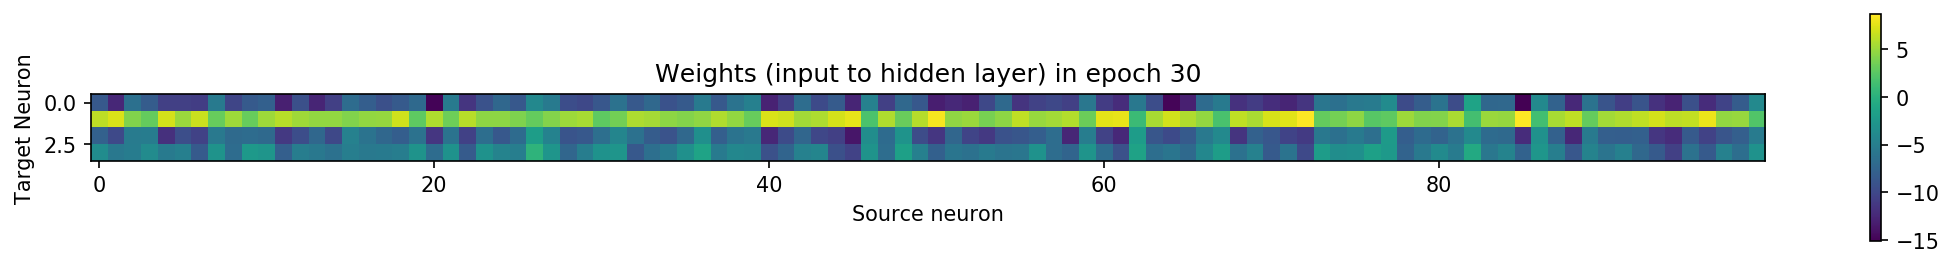

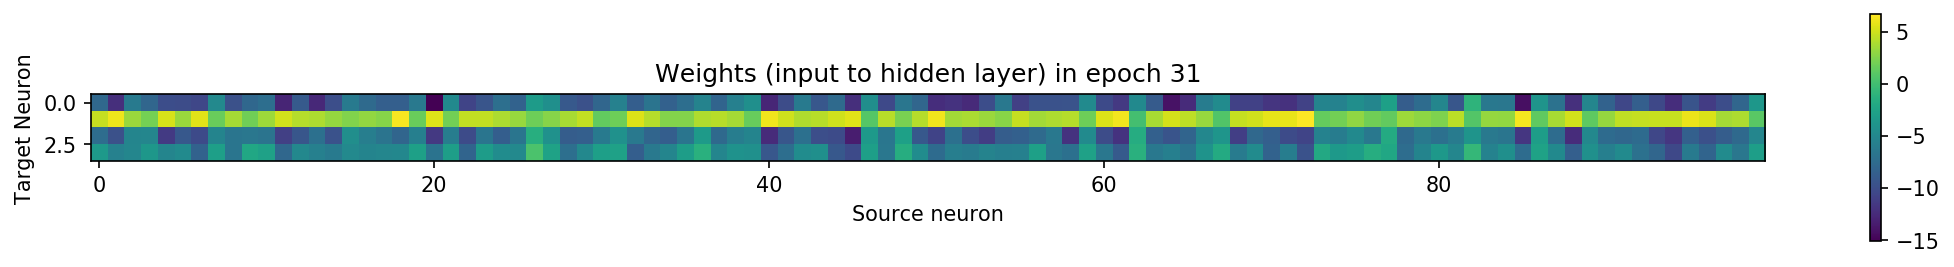

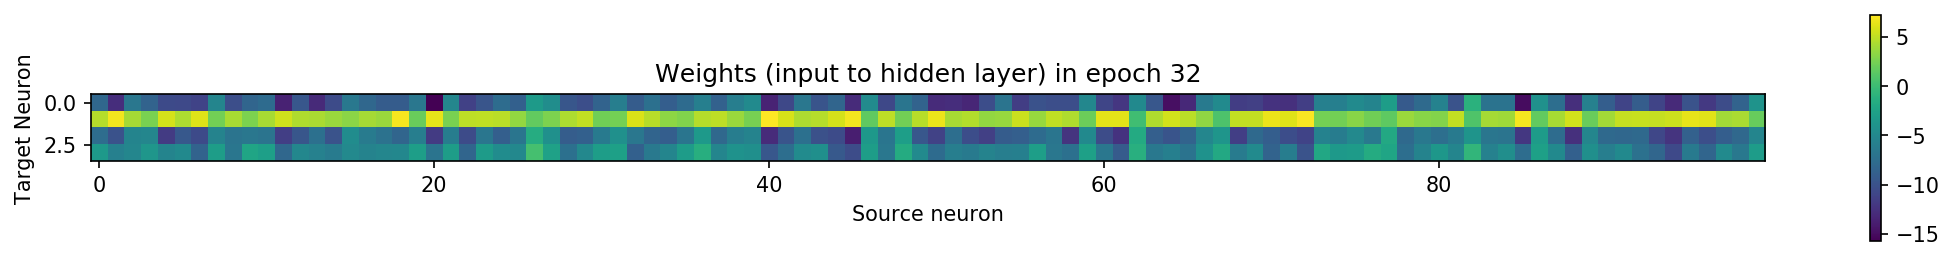

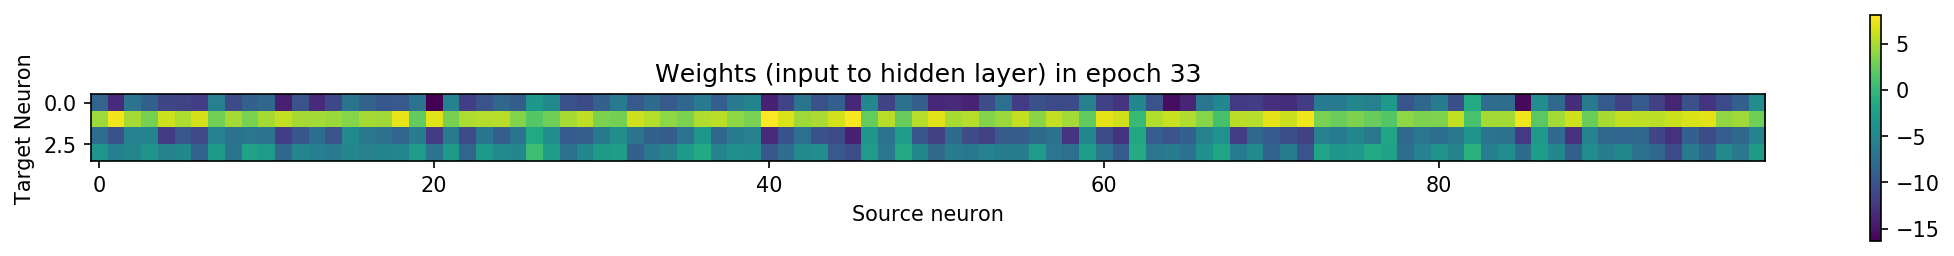

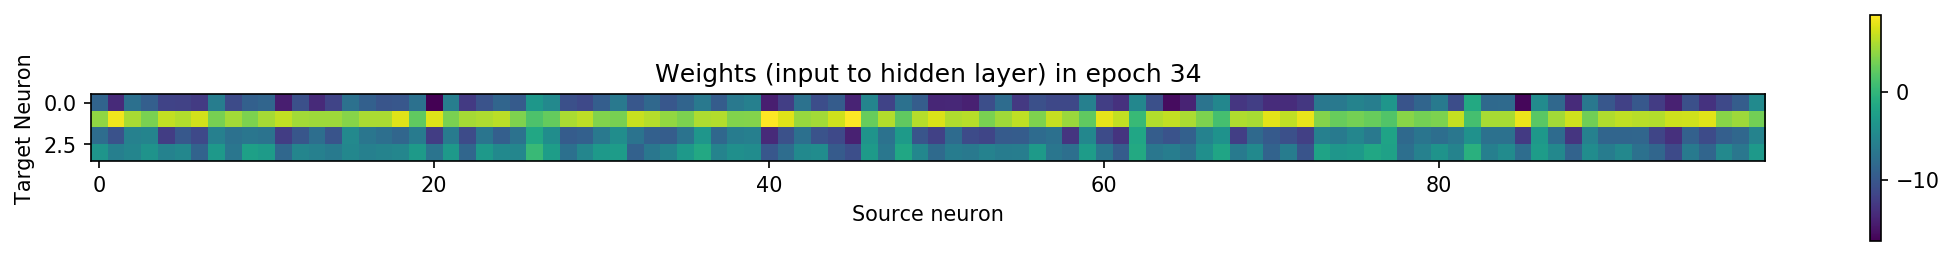

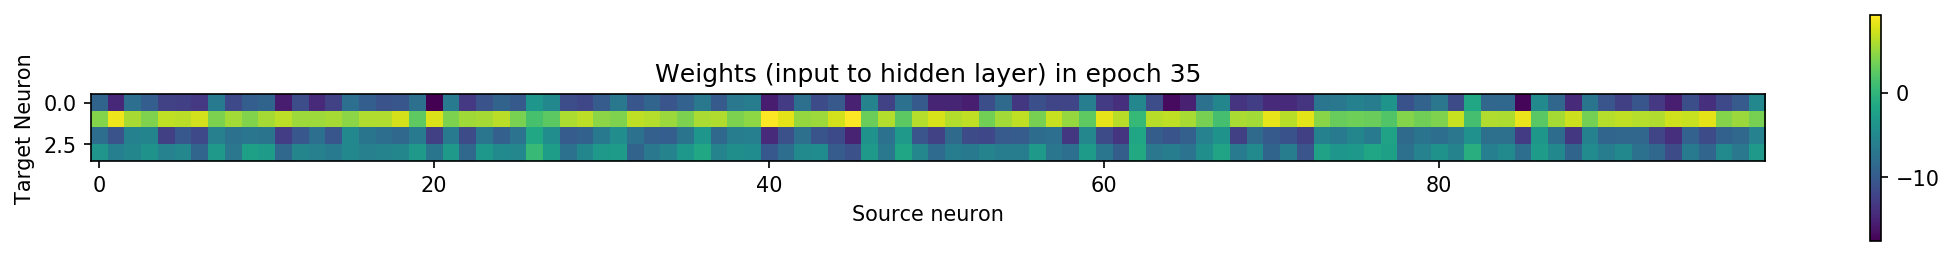

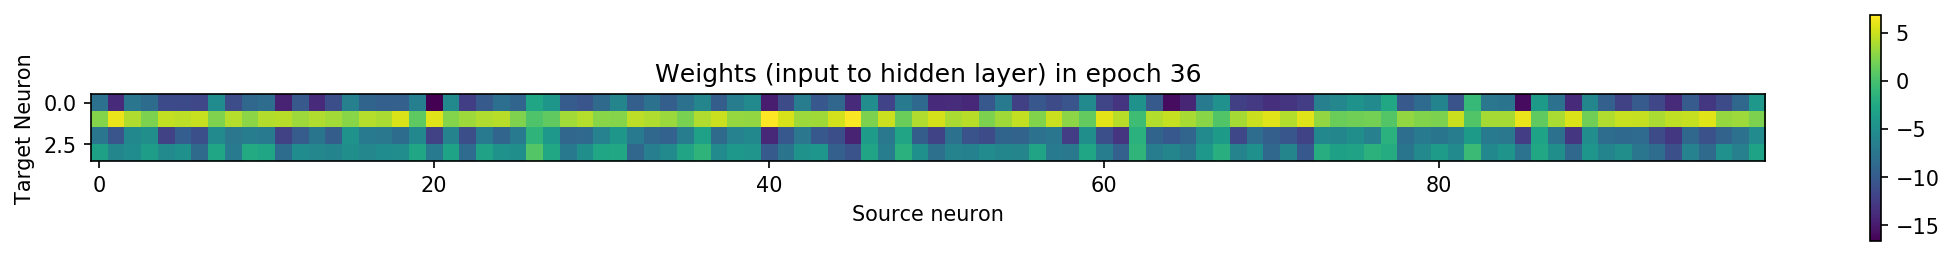

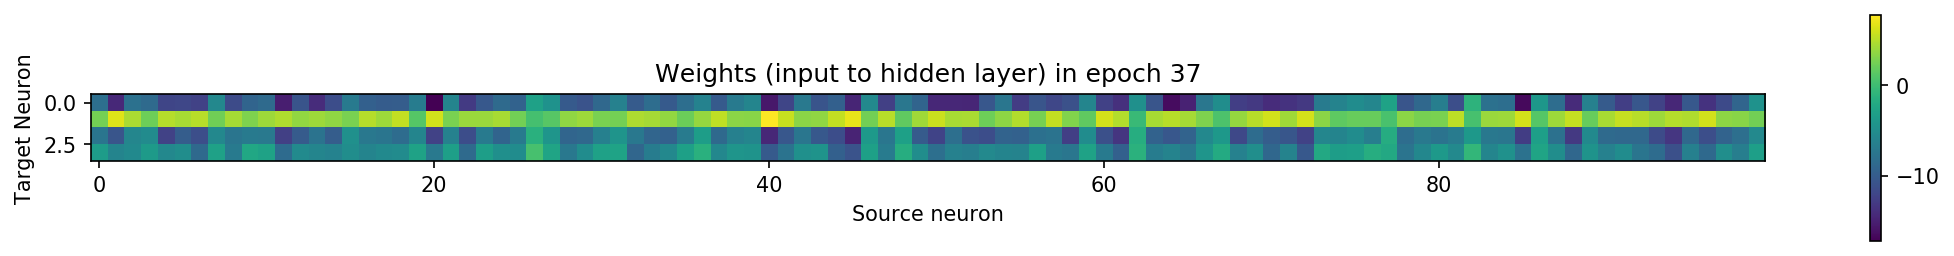

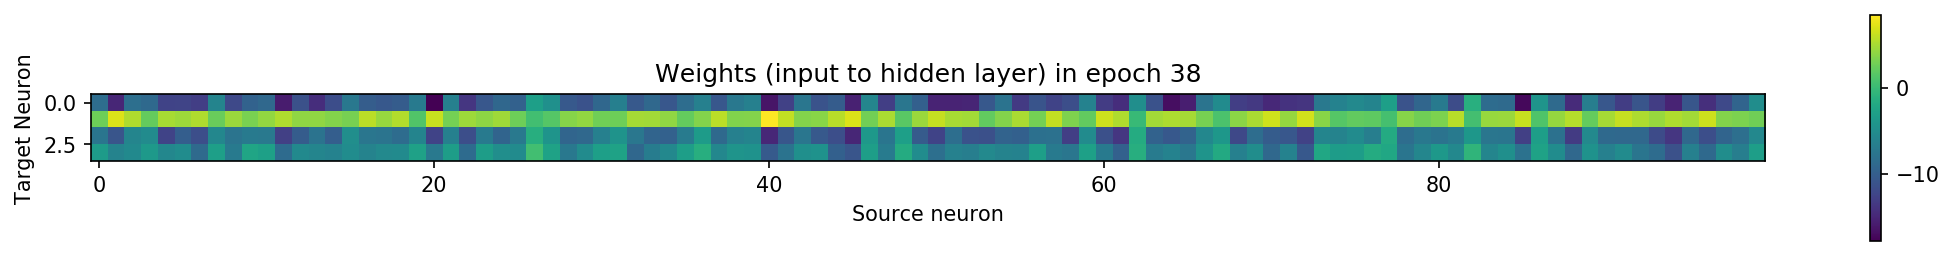

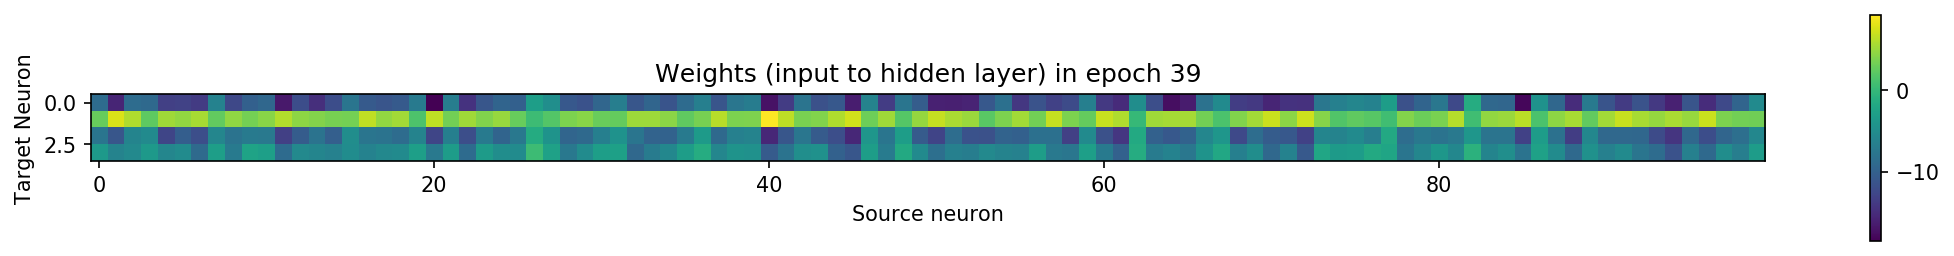

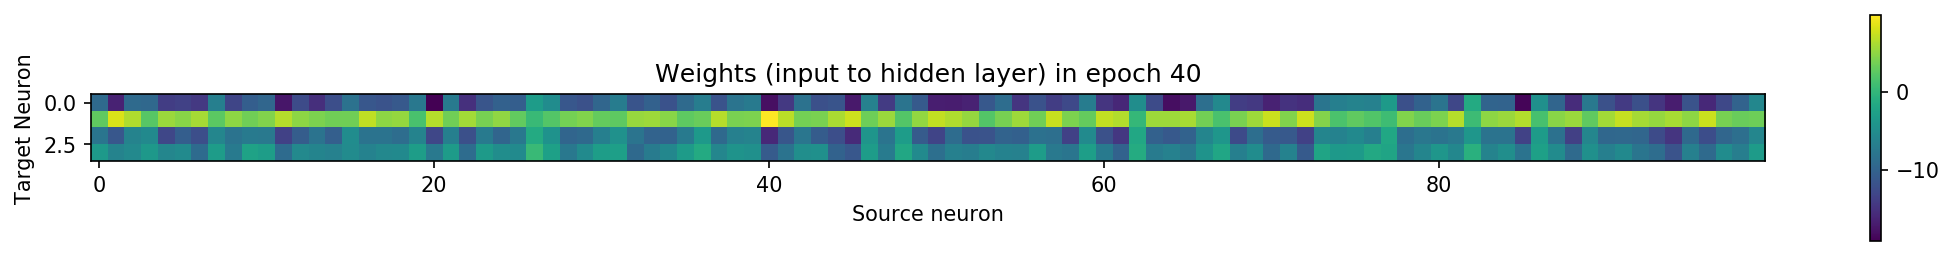

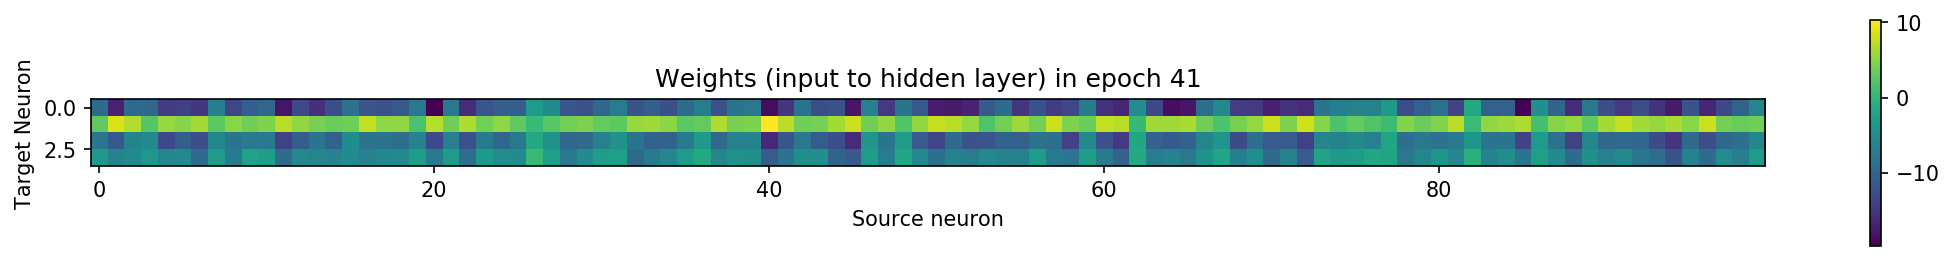

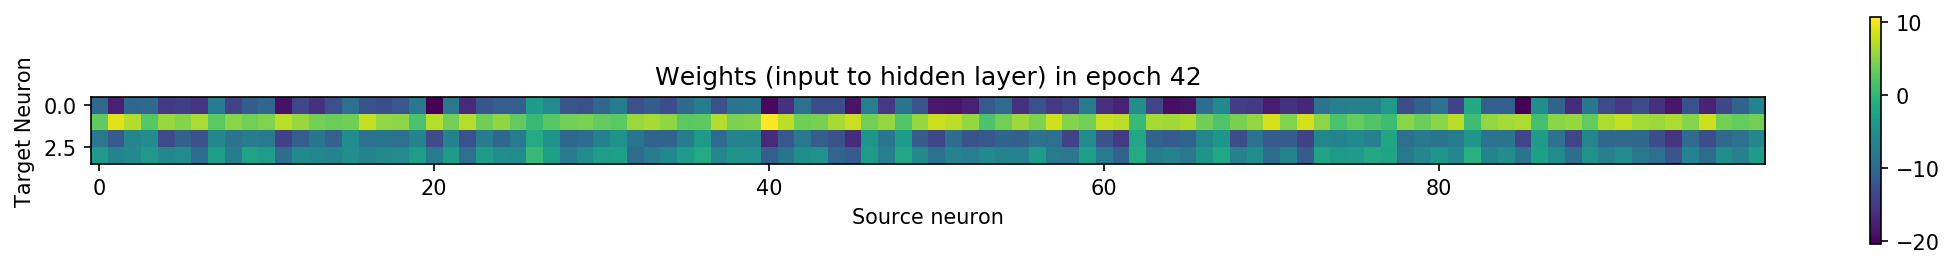

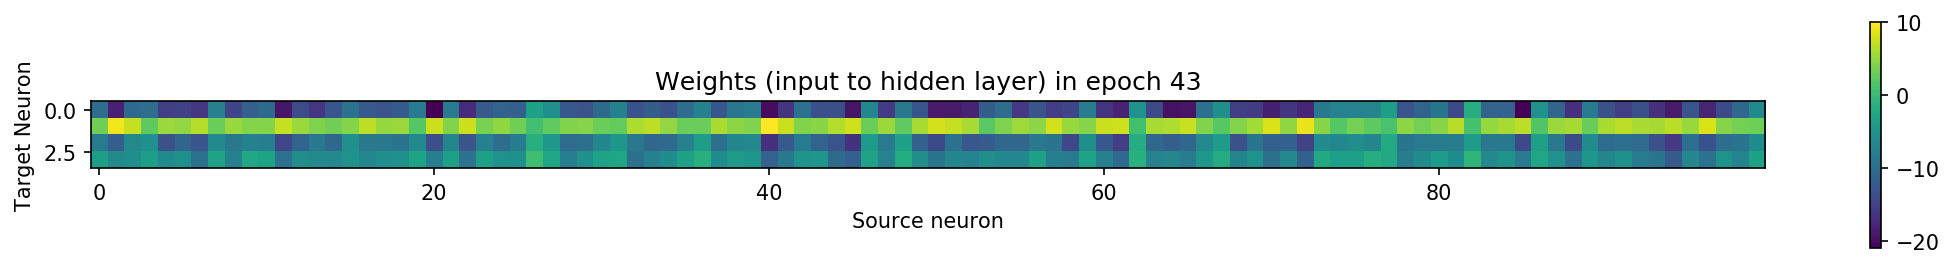

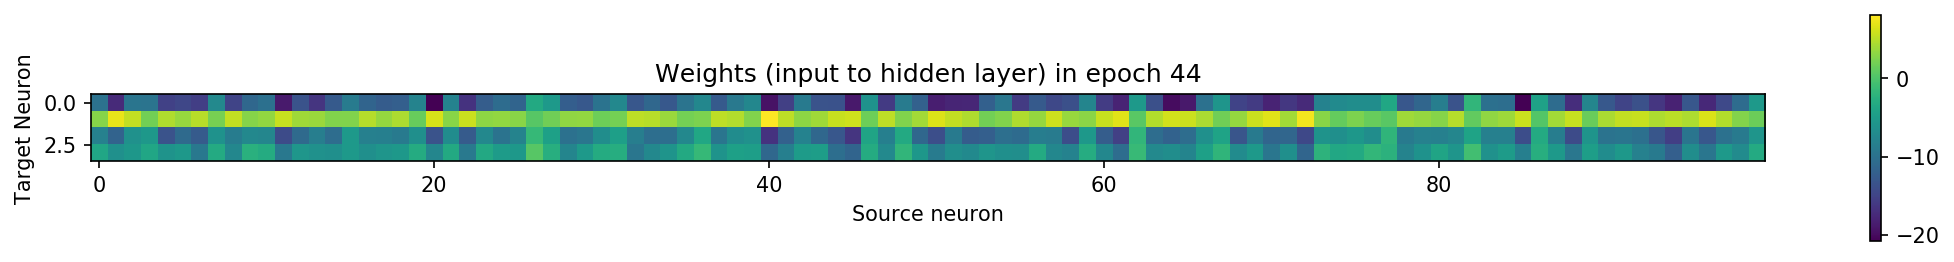

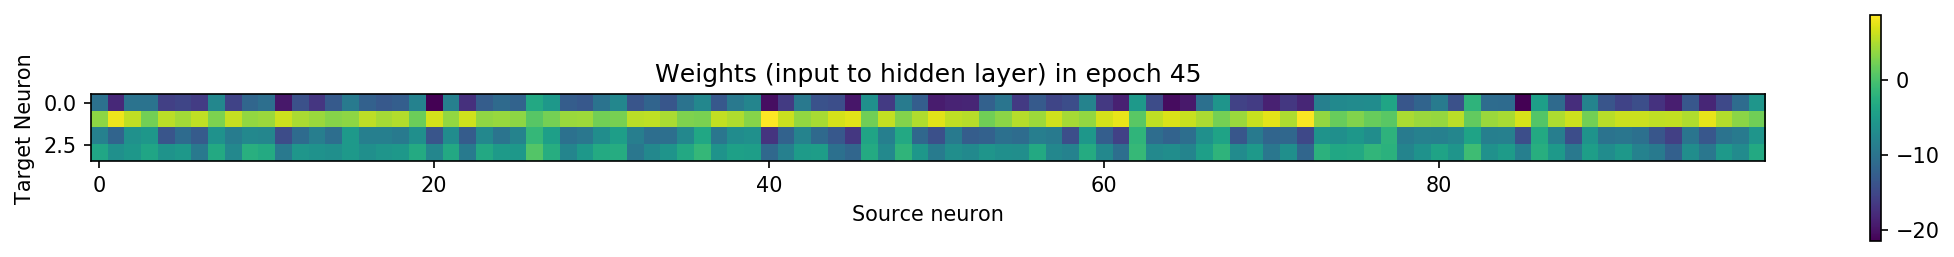

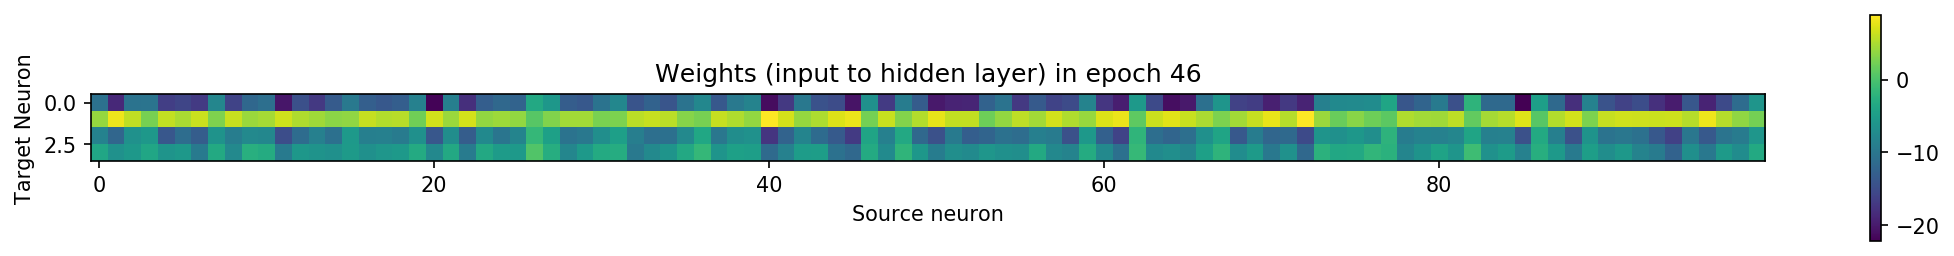

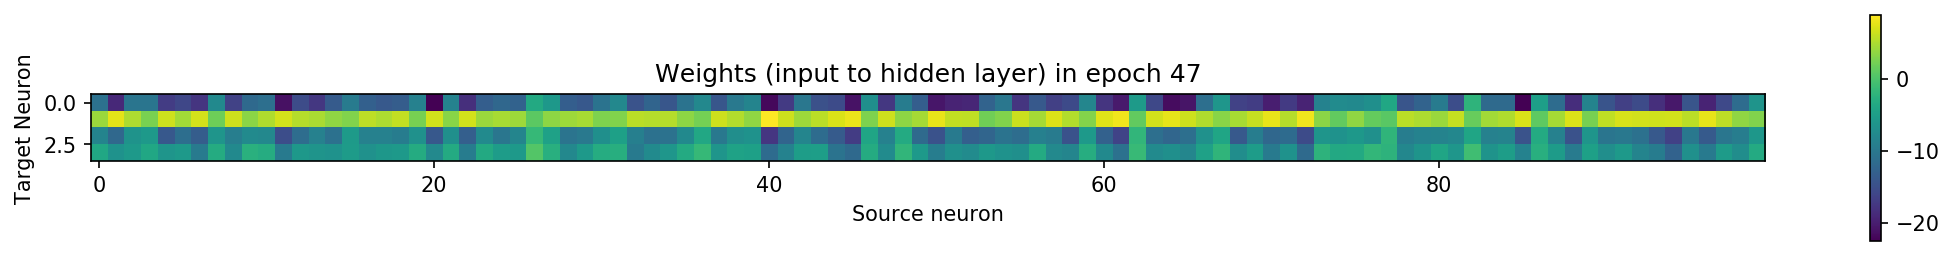

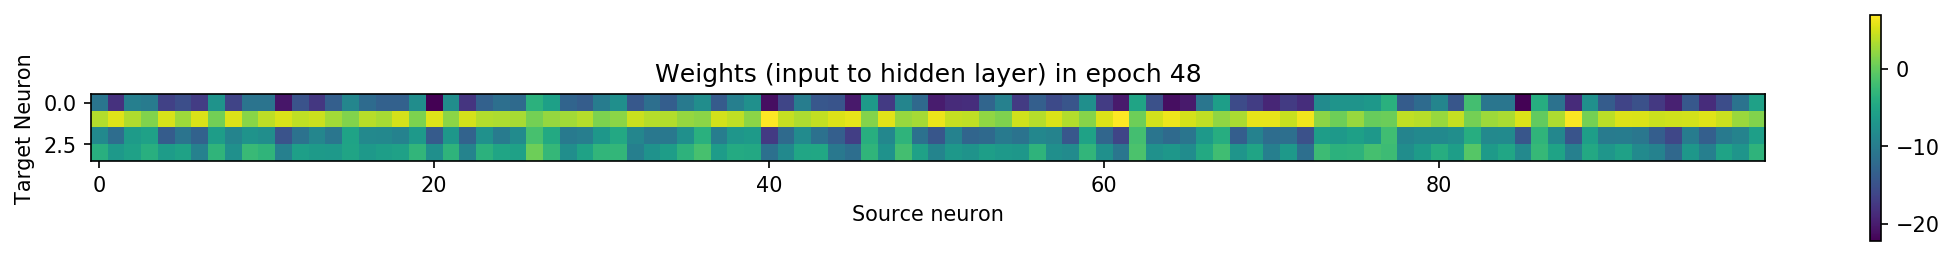

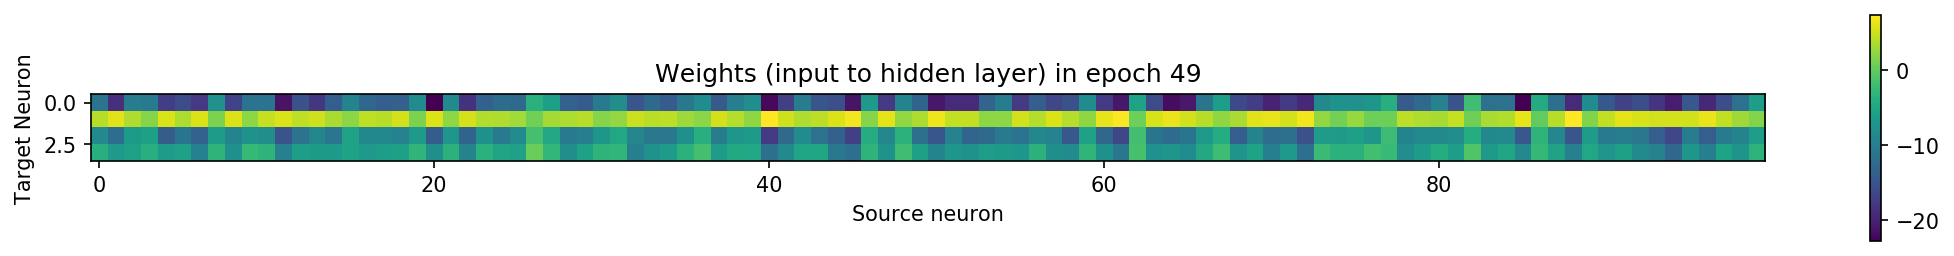

In [20]:
for i in range(args['nb_epochs']):
    epoch = i
    plt.figure(figsize=(18,2), dpi=150)
    plt.imshow(w1_rec[epoch].T)
    plt.colorbar()
    plt.title("Weights (input to hidden layer) in epoch " + str(epoch))
    plt.xlabel("Source neuron")
    plt.ylabel("Target Neuron")
    plt.show()
    # plot_w1_change = weight_change_1_rec.flatten()

Text(0, 0.5, 'Target Neuron')

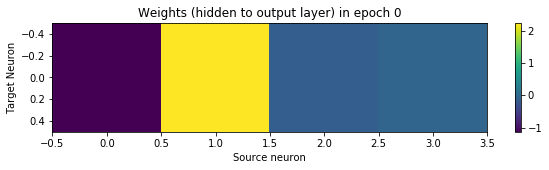

In [26]:

plt.figure(figsize=(10,2))
plt.imshow(w2_rec[epoch].T)
plt.colorbar()
plt.title("Weights (hidden to output layer) in epoch " + str(epoch))
plt.xlabel("Source neuron")
plt.ylabel("Target Neuron")

### Weight Update

Weight update is the final change in the weight after multiplying gradient with learning rate and adding the regularization term

How to visualize weight change?
Weight

### Input-Hidden layer

Text(0, 0.5, 'Target Neuron')

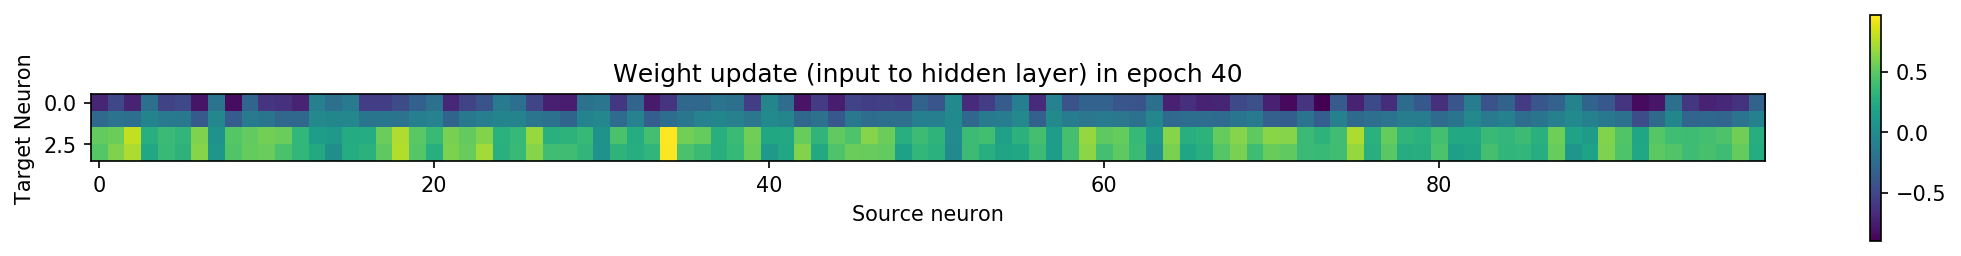

In [74]:
epoch = 40
weight_update_1_rec.shape

plt.figure(figsize=(18,2), dpi=150)
plt.imshow(weight_update_1_rec[epoch].T)
plt.colorbar()
plt.title("Weight update (input to hidden layer) in epoch " + str(epoch))
plt.xlabel("Source neuron")
plt.ylabel("Target Neuron")
# plot_w1_change = weight_change_1_rec.flatten()

Text(0, 0.5, 'Target Neuron')

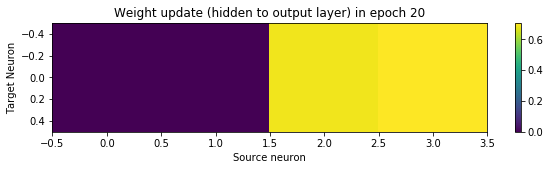

In [92]:
epoch = 20
weight_update_1_rec.shape

plt.figure(figsize=(10,2))
plt.imshow(weight_update_2_rec[epoch].T)
plt.colorbar()
plt.title("Weight update (hidden to output layer) in epoch " + str(epoch))
plt.xlabel("Source neuron")
plt.ylabel("Target Neuron")

### Learning Rate

#### Hidden layer

(tensor([[[6.7703e-03, 1.0042e-02, 2.9115e-02, 6.1246e-03],
          [5.1076e-03, 7.2678e-03, 1.7150e-02, 4.2446e-03],
          [4.1633e-03, 6.1893e-03, 1.6475e-02, 3.6624e-03],
          ...,
          [6.2283e-03, 8.5542e-03, 2.3868e-02, 5.4668e-03],
          [7.9510e-03, 1.1194e-02, 2.9848e-02, 6.9648e-03],
          [4.0644e-03, 5.9478e-03, 1.6553e-02, 3.8908e-03]],
 
         [[5.5297e-03, 8.1340e-03, 2.3689e-02, 6.7687e-03],
          [4.1074e-03, 5.7533e-03, 1.3246e-02, 4.6910e-03],
          [3.2871e-03, 4.8222e-03, 1.2740e-02, 4.0475e-03],
          ...,
          [4.9164e-03, 6.6369e-03, 1.8625e-02, 6.0417e-03],
          [6.4949e-03, 9.0312e-03, 2.4002e-02, 7.6973e-03],
          [3.0874e-03, 4.4505e-03, 1.2510e-02, 4.3000e-03]],
 
         [[4.4078e-03, 6.4141e-03, 1.8747e-02, 7.4806e-03],
          [3.2097e-03, 4.3991e-03, 9.7763e-03, 5.1843e-03],
          [2.5001e-03, 3.5947e-03, 9.3976e-03, 4.4732e-03],
          ...,
          [3.7226e-03, 4.9105e-03, 1.3904e-02, 6.